<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [ ]:
import pandas as pd
df = pd.read_csv("Data/carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [ ]:
import matplotlib.pyplot as plt

**Car Mileage Vs Sell Price ($)**

<matplotlib.collections.PathCollection>

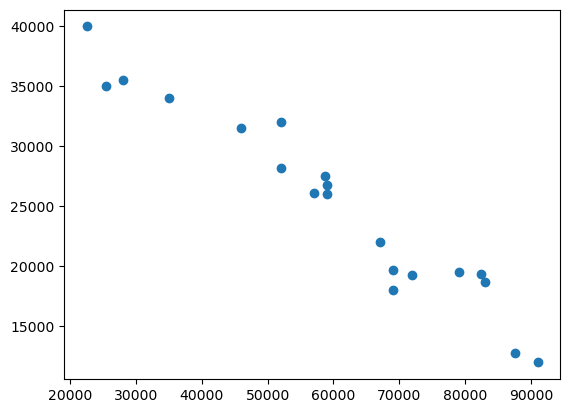

In [ ]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

<matplotlib.collections.PathCollection>

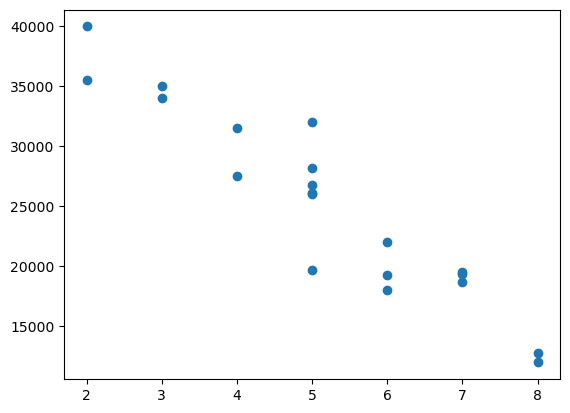

In [ ]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [ ]:
X = df[['Mileage','Age(yrs)']]

In [ ]:
y = df['Sell Price($)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,Mileage,Age(yrs)
2,57000,5
5,59000,5
11,79000,7
1,35000,3
15,25400,3
8,91000,8
14,82450,7
9,67000,6
4,46000,4
7,72000,6


In [ ]:
X_test

,Mileage,Age(yrs)
6,52000,5
0,69000,6
19,52000,5
13,58780,4
16,28000,2
12,59000,5


In [ ]:
y_train

11    19500
17    19700
10    18700
1     34000
0     18000
8     12000
7     19300
16    35500
6     32000
4     31500
19    28200
2     26100
5     26750
15    35000
Name: Sell Price($), dtype: int64

In [ ]:
y_test

3     40000
12    26000
14    19400
13    27500
9     22000
18    12800
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,Mileage,Age(yrs)
6,52000,5
0,69000,6
19,52000,5
13,58780,4
16,28000,2
12,59000,5


In [ ]:
clf.predict(X_test)

array([20795.62497033, 16717.8407409 , 25463.14706945, 27527.22961336,
       38728.54102971, 14527.21769447])

In [ ]:
y_results = pd.DataFrame(clf.predict(X_test))
y_results

,0
0,20795.624970
1,16717.840741
2,25463.147069
3,27527.229613
4,38728.541030
5,14527.217694


In [ ]:
y_res = y_results[0].sort_values(ascending=True).reset_index()
y_res.drop('index', axis = 1, inplace=True)
y_res

,0
0,14527.217694
1,16717.840741
2,20795.624970
3,25463.147069
4,27527.229613
5,38728.541030


In [ ]:
y_test

7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: Sell Price($), dtype: int64

In [ ]:
y_t = y_test.sort_values(ascending=True).reset_index()
y_t

,index,Sell Price($)
0,18,12800
1,10,18700
2,7,19300
3,5,26750
4,6,32000
5,3,40000


In [ ]:
y_t.drop('index', axis = 1, inplace=True)
y_t

,Sell Price($)
0,12800
1,18700
2,19300
3,26750
4,32000
5,40000


[<matplotlib.lines.Line2D>]

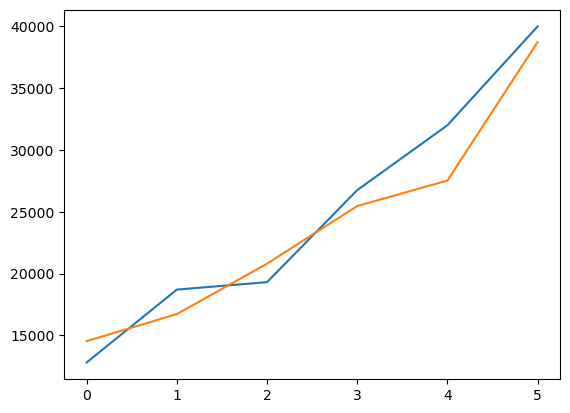

In [ ]:
plt.plot(y_t)
plt.plot(y_res)

In [ ]:
clf.score(X_test, y_test)

0.9348911052302149

**random_state argument**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8
